In [1]:
import sys
sys.path.append('/home/zhangjianquan/anaconda3/lib/python3.7/site-packages/')

In [2]:
sys.path.append('./module/')
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
from predict_preprocess import predict_preprocess
from predict_qualified import predict_qualified
from predict_encoding import predict_encoding
from predict_feature import predict_feature
from predict_model import predict_model
from predict_prediction import predict_prediction 
from predict_analysis import predict_analysis

In [4]:
input_path = '../../../Data/Price_System/Price_Predict/raw/house/used_house_data_test.csv'
output_path = '../../../Data/Price_System/Price_Predict/preprocess/house/used_house_data_test_intermediate.csv'
data_preprocess, cols = predict_preprocess(input_path=input_path, 
                                     output_path=output_path,
                                     is_need=1)
data_preprocess

经纬度转换
经纬度转换开始
转换后数据规格：(100, 27)
耗时：13.6200
经纬度转换结束


,House_Type,Final_Price,Transaction_Cycle,Num_Price_Adjustment,Num_Look,Attention,Num_Browse,Floor,Construction_Area,Unit_Structure,...,Elevator,Trading_Authority,Housing_Purposes,House_Ownership,Year_Of_Housing,Storey,Ladder,Household,Longitude,Latitude
0,1室1厅,218.0,149.0,1,4,9,1565.0,中,46.0,NaN,...,有,动迁安置房,普通住宅,非共有,NaN,28.0,1.0,6.0,121.514616,31.133690
1,3室2厅,1620.0,8.0,0,4,8,252.0,中,150.0,NaN,...,有,商品房,普通住宅,共有,NaN,32.0,2.0,2.0,121.545452,31.234944
2,2室1厅,368.0,43.0,1,1,0,NaN,低,59.0,平层,...,无,商品房,普通住宅,非共有,NaN,6.0,1.0,4.0,121.504486,31.187161
3,2室2厅,368.0,105.0,1,18,167,6048.0,低,89.0,平层,...,有,商品房,普通住宅,NaN,NaN,18.0,2.0,4.0,121.596303,31.122068
4,2室2厅,289.0,108.0,1,0,25,2956.0,高,80.0,平层,...,有,动迁安置房,普通住宅,共有,NaN,11.0,1.0,4.0,116.632891,40.329616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2室1厅,220.0,354.0,1,4,37,5355.0,低,66.0,平层,...,无,商品房,普通住宅,共有,NaN,6.0,1.0,2.0,121.407487,31.074013
96,3室2厅,878.0,69.0,1,0,11,1099.0,低,132.0,NaN,...,有,商品房,普通住宅,非共有,NaN,18.0,2.0,4.0,121.371859,31.148492
97,2室2厅,371.0,48.0,1,1,19,1446.0,高,77.0,平层,...,有,商品房,普通住宅,非共有,NaN,28.0,1.0,2.0,121.387241,31.030584
98,3室2厅,850.0,68.0,1,4,1,592.0,低,129.0,平层,...,有,商品房,普通住宅,共有,NaN,11.0,1.0,2.0,121.341557,31.159538


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
Glyph 32570 missing from current font.
Glyph 22833 missing from current font.
Glyph 29575 missing from current font.
Glyph 24773 missing from current font.
Glyph 20917 missing from current font.
Glyph 32479 missing from current font.
Glyph 35745 missing from current font.
Glyph 32570 missing from current font.
Glyph 22833 missing from current font.
Glyph 29575 missing from current font.
Glyph 24773 missing from current font.
Glyph 20917 missing from current font.
Glyph 32479 missing from current font.
Glyph 35745 missing from current font.
Glyph 20540 missing from current font.
Glyph 20010 missing from current font.
Glyph 25968 missing from current font.
Glyph 29305 missing from current font.
Glyph 24449 missing from current font.
Glyph 20540 missing from current font.
Glyph 20010 missing from current font.
Glyph 25968 missing from current font.
Glyph 29305 missing from current font.
Glyph 24449 missing from c

数据去重开始
去重后数据规格：(100, 27)
数据去重结束
去除了缺失率超过40 % 的特征:
Property_Rights_Time
Year_Of_Housing
数值型数据EM插补开始,总数据量：100
数值型数据EM插补完成，耗时0秒
非数值型数据EM插补开始,总数据量：100
分类变量预编码完成，开始数据插值
分类变量插值与反编码完成，共耗时0秒
异常检测开始


All-NaN slice encountered
All-NaN slice encountered

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pyda

Iteration num: 2
=========异常点作图========


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
Glyph 32570 missing from current font.
Glyph 22833 missing from current font.
Glyph 29575 missing from current font.
Glyph 24773 missing from current font.
Glyph 20917 missing from current font.
Glyph 32479 missing from current font.
Glyph 35745 missing from current font.
Glyph 32570 missing from current font.
Glyph 22833 missing from current font.
Glyph 29575 missing from current font.
Glyph 24773 missing from current font.
Glyph 20917 missing from current font.
Glyph 32479 missing from current font.
Glyph 35745 missing from current font.


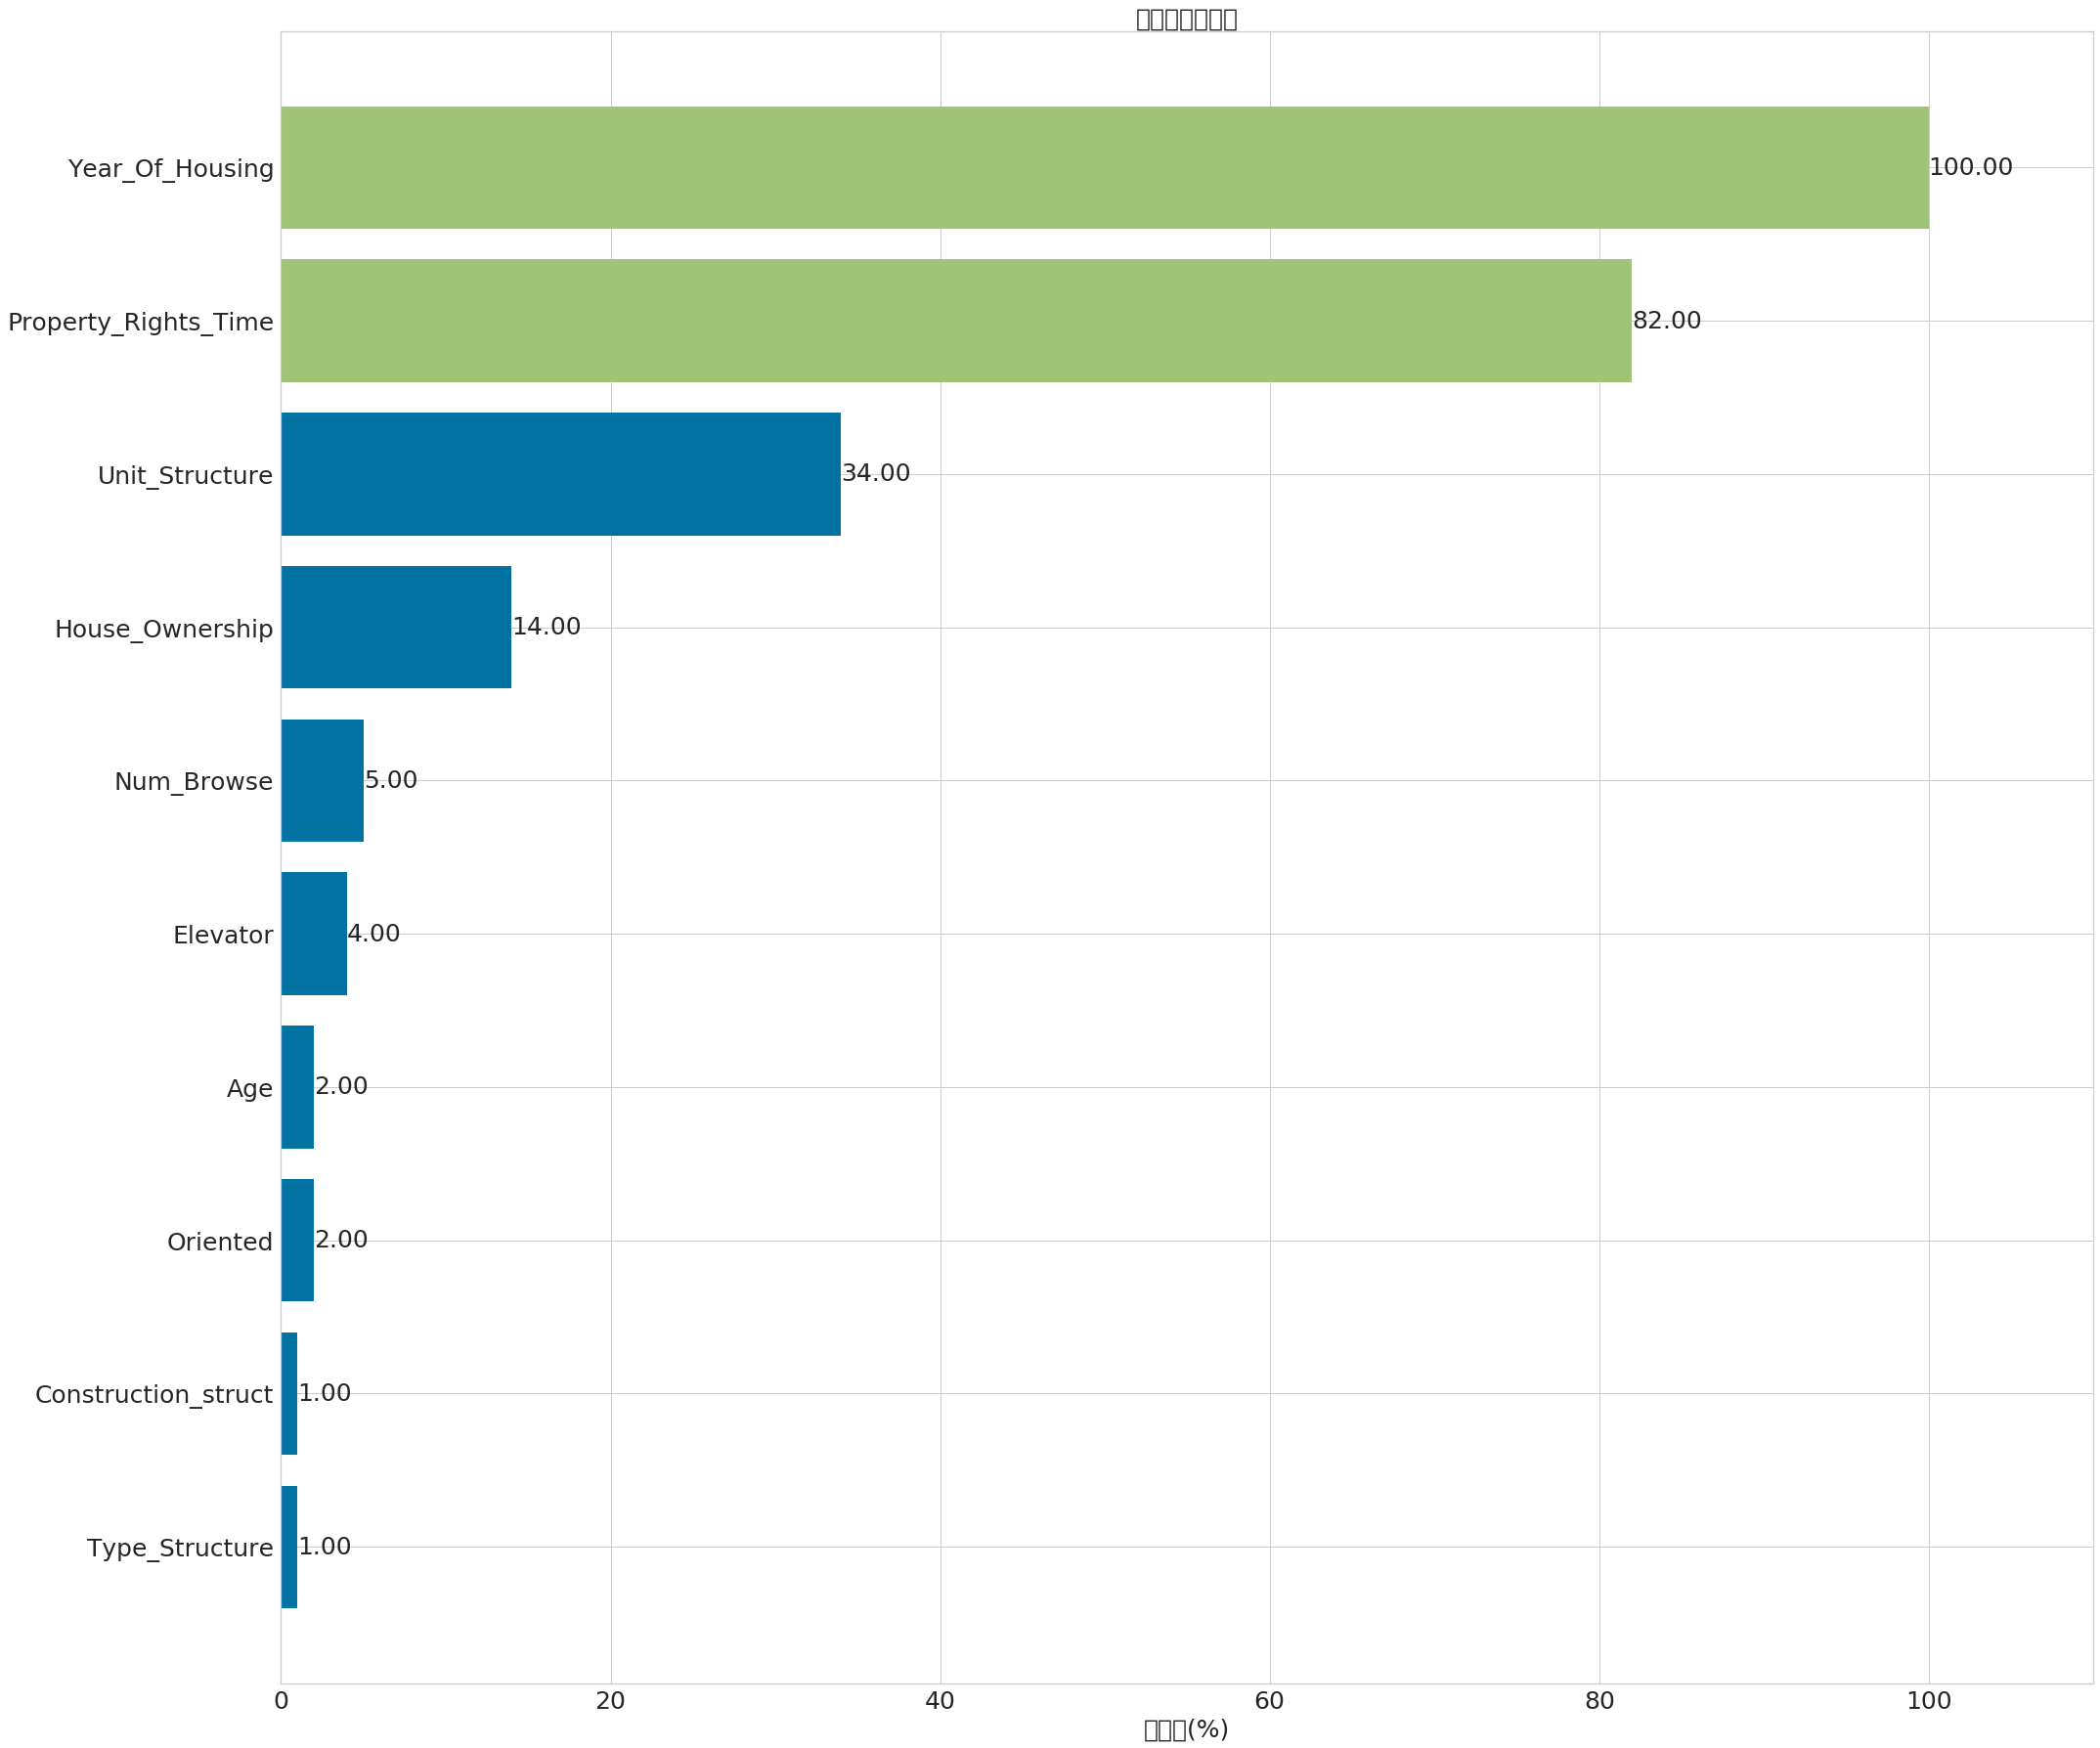

Glyph 29305 missing from current font.
Glyph 24449 missing from current font.
Glyph 20540 missing from current font.
Glyph 20010 missing from current font.
Glyph 25968 missing from current font.
Glyph 20540 missing from current font.
Glyph 20010 missing from current font.
Glyph 25968 missing from current font.
Glyph 29305 missing from current font.
Glyph 24449 missing from current font.


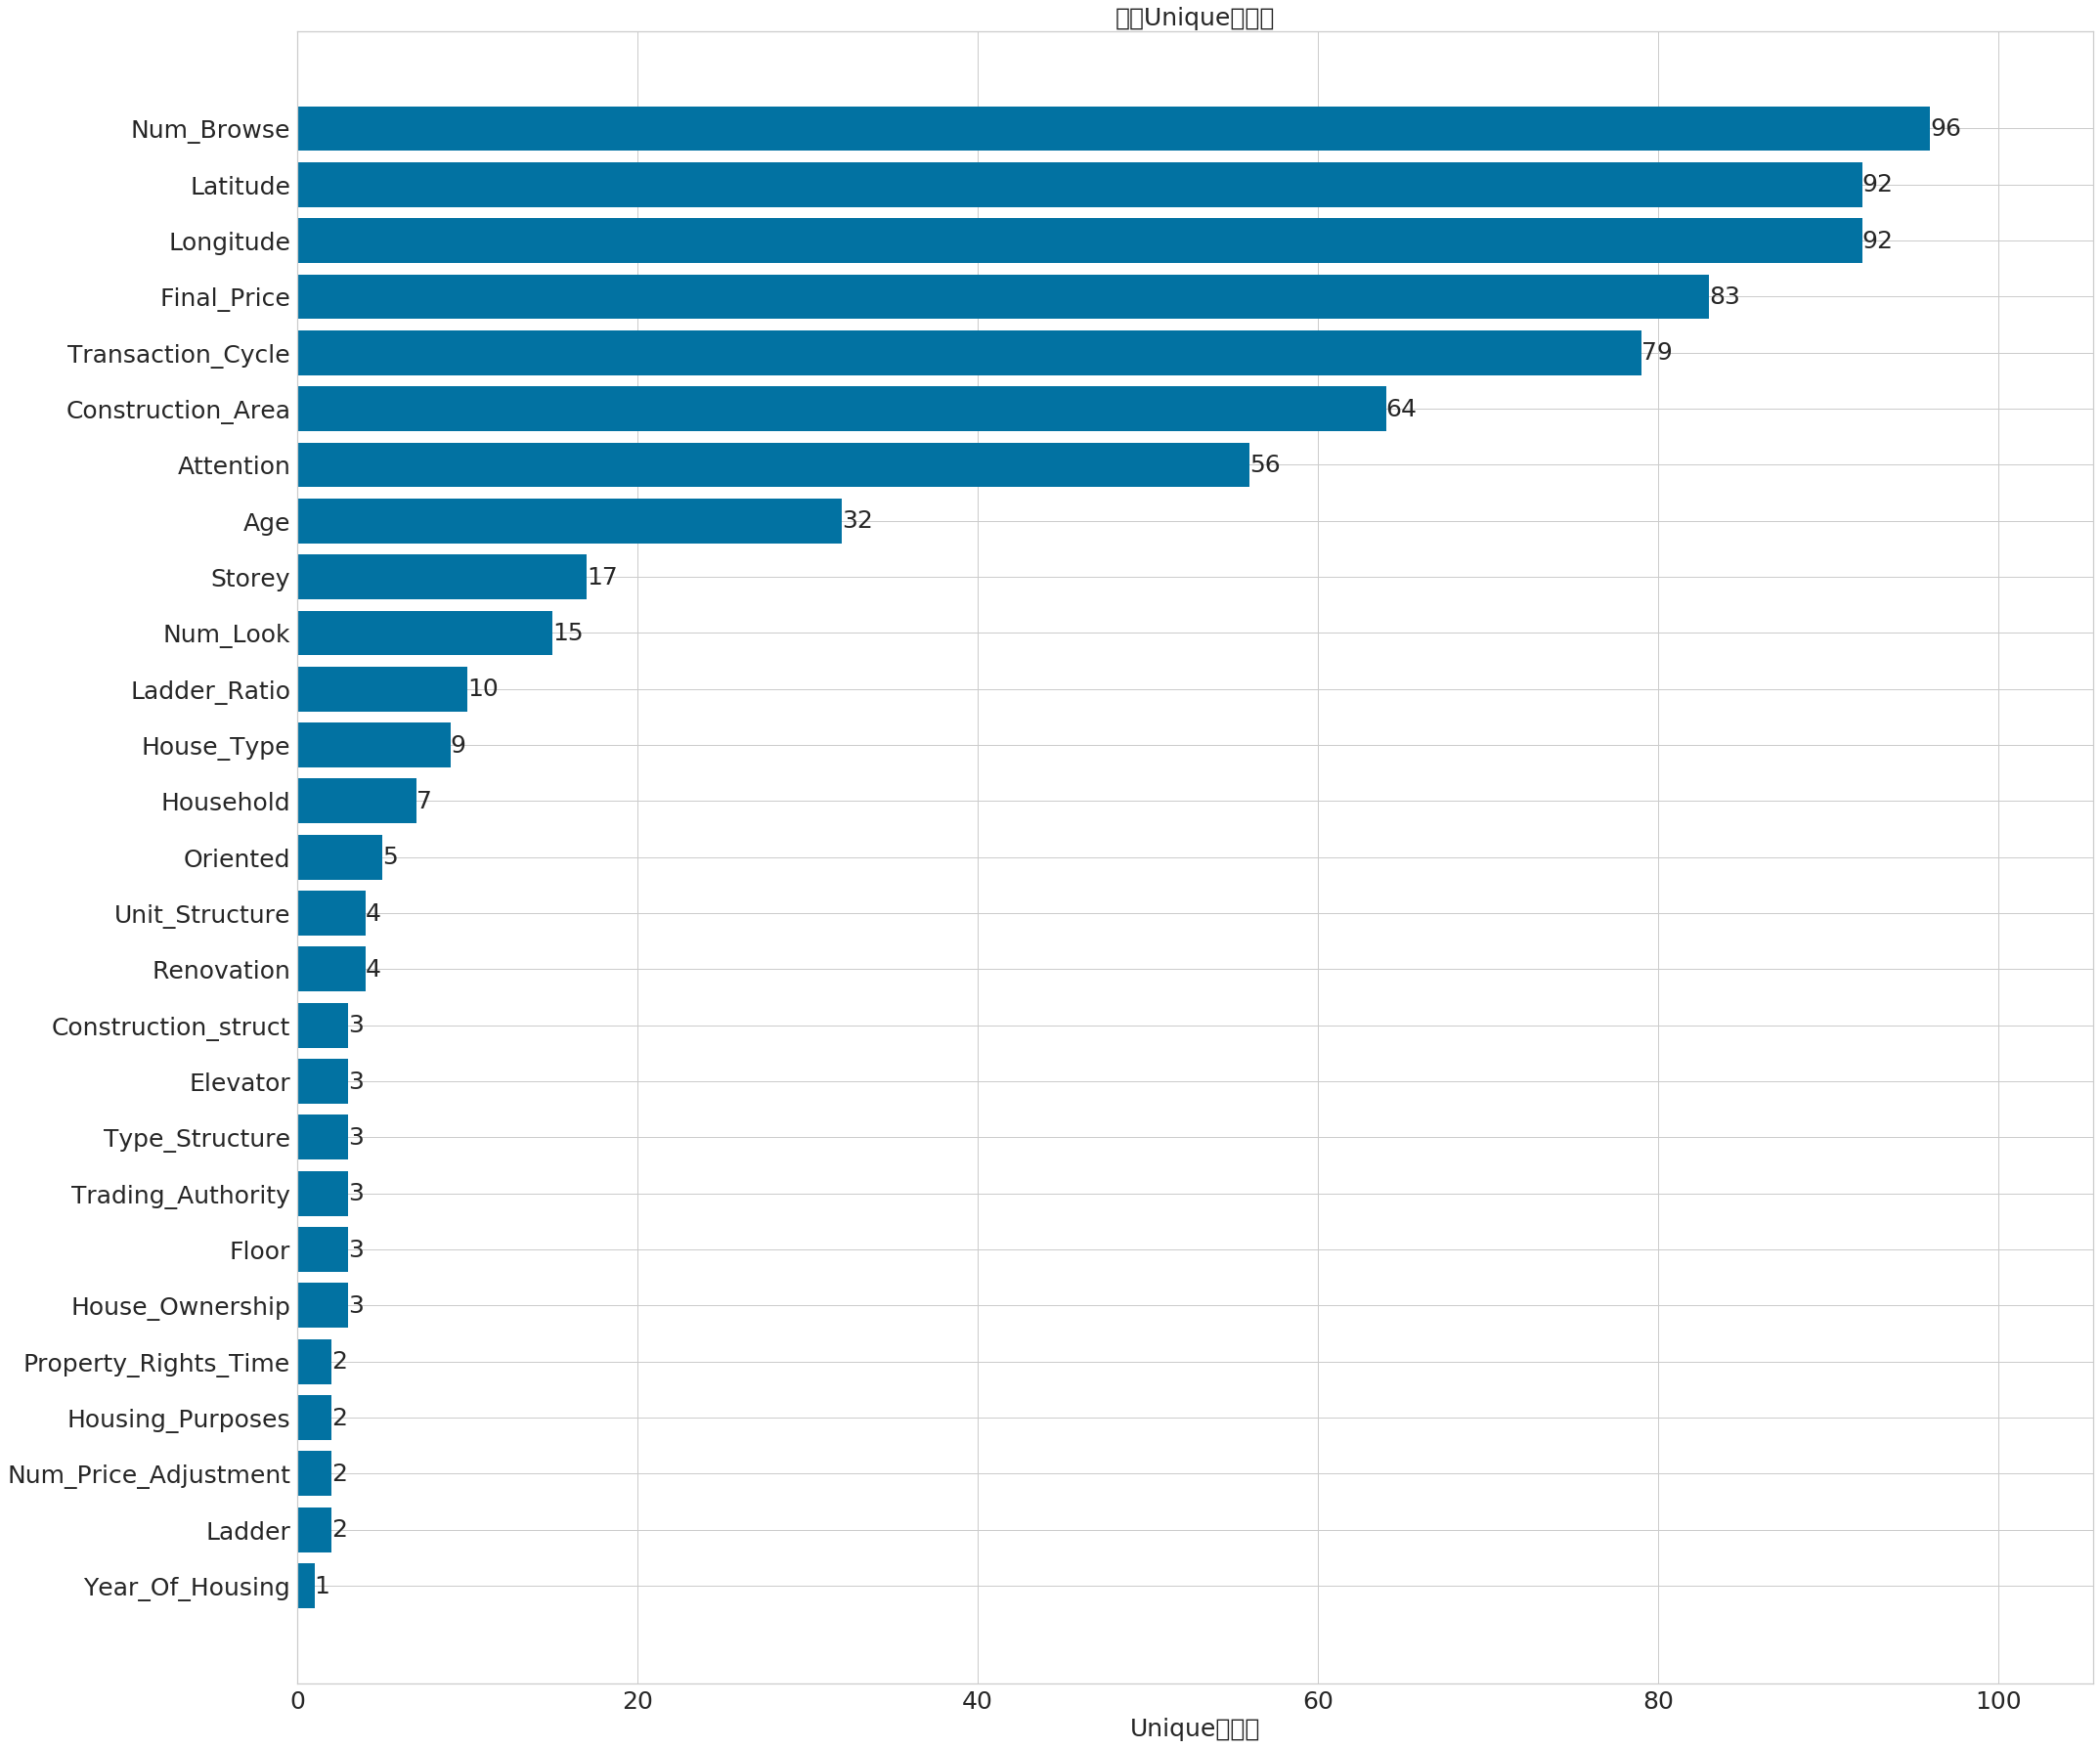

Glyph 25454 missing from current font.
Glyph 20998 missing from current font.
Glyph 24067 missing from current font.
Glyph 21462 missing from current font.
Glyph 21462 missing from current font.
Glyph 25454 missing from current font.
Glyph 20998 missing from current font.
Glyph 24067 missing from current font.


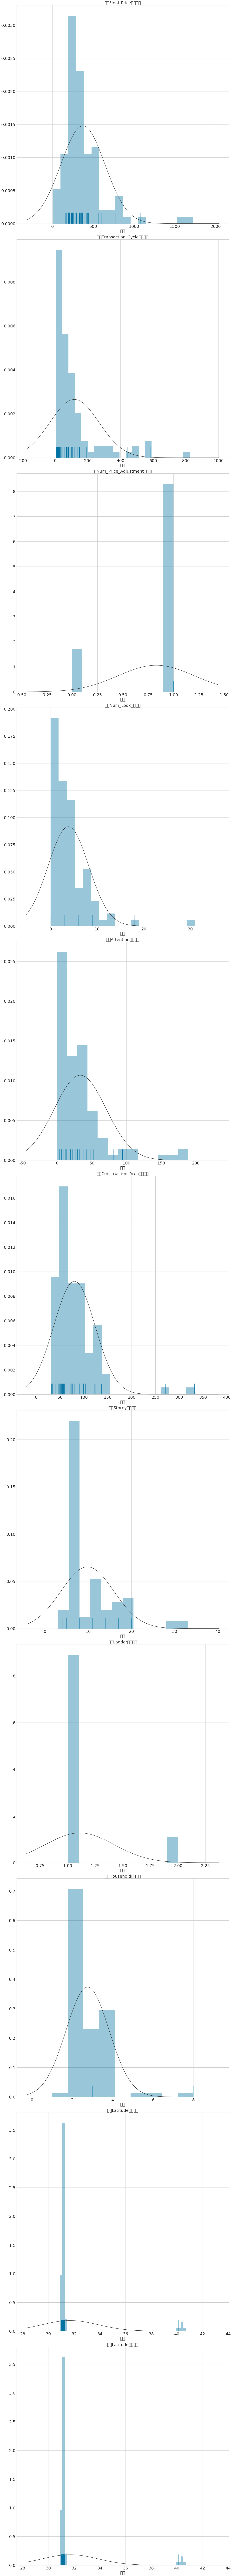

Glyph 20027 missing from current font.
Glyph 35201 missing from current font.
Glyph 26222 missing from current font.
Glyph 36890 missing from current font.
Glyph 20303 missing from current font.
Glyph 23429 missing from current font.
Glyph 21035 missing from current font.
Glyph 22661 missing from current font.
Glyph 26222 missing from current font.
Glyph 36890 missing from current font.
Glyph 20303 missing from current font.
Glyph 23429 missing from current font.
Glyph 21035 missing from current font.
Glyph 22661 missing from current font.
Glyph 20027 missing from current font.
Glyph 35201 missing from current font.
Glyph 19968 missing from current font.
Glyph 26799 missing from current font.
Glyph 20004 missing from current font.
Glyph 25143 missing from current font.
Glyph 22235 missing from current font.
Glyph 19977 missing from current font.
Glyph 20843 missing from current font.
Glyph 20116 missing from current font.
Glyph 20845 missing from current font.
Glyph 19968 missing from 

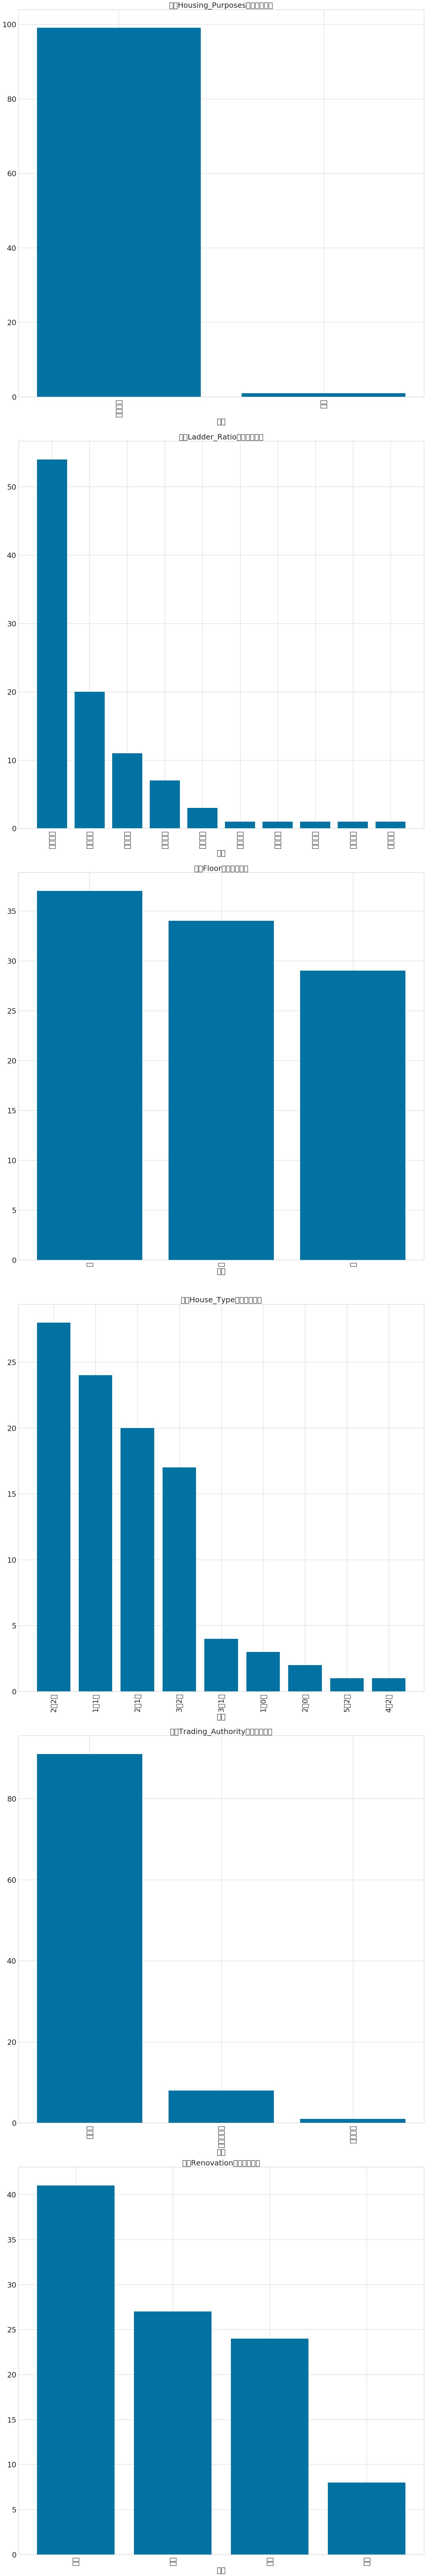

Glyph 30456 missing from current font.
Glyph 20851 missing from current font.
Glyph 24230 missing from current font.
Glyph 21517 missing from current font.
Glyph 31216 missing from current font.
Glyph 21517 missing from current font.
Glyph 31216 missing from current font.
Glyph 30456 missing from current font.
Glyph 20851 missing from current font.
Glyph 24230 missing from current font.


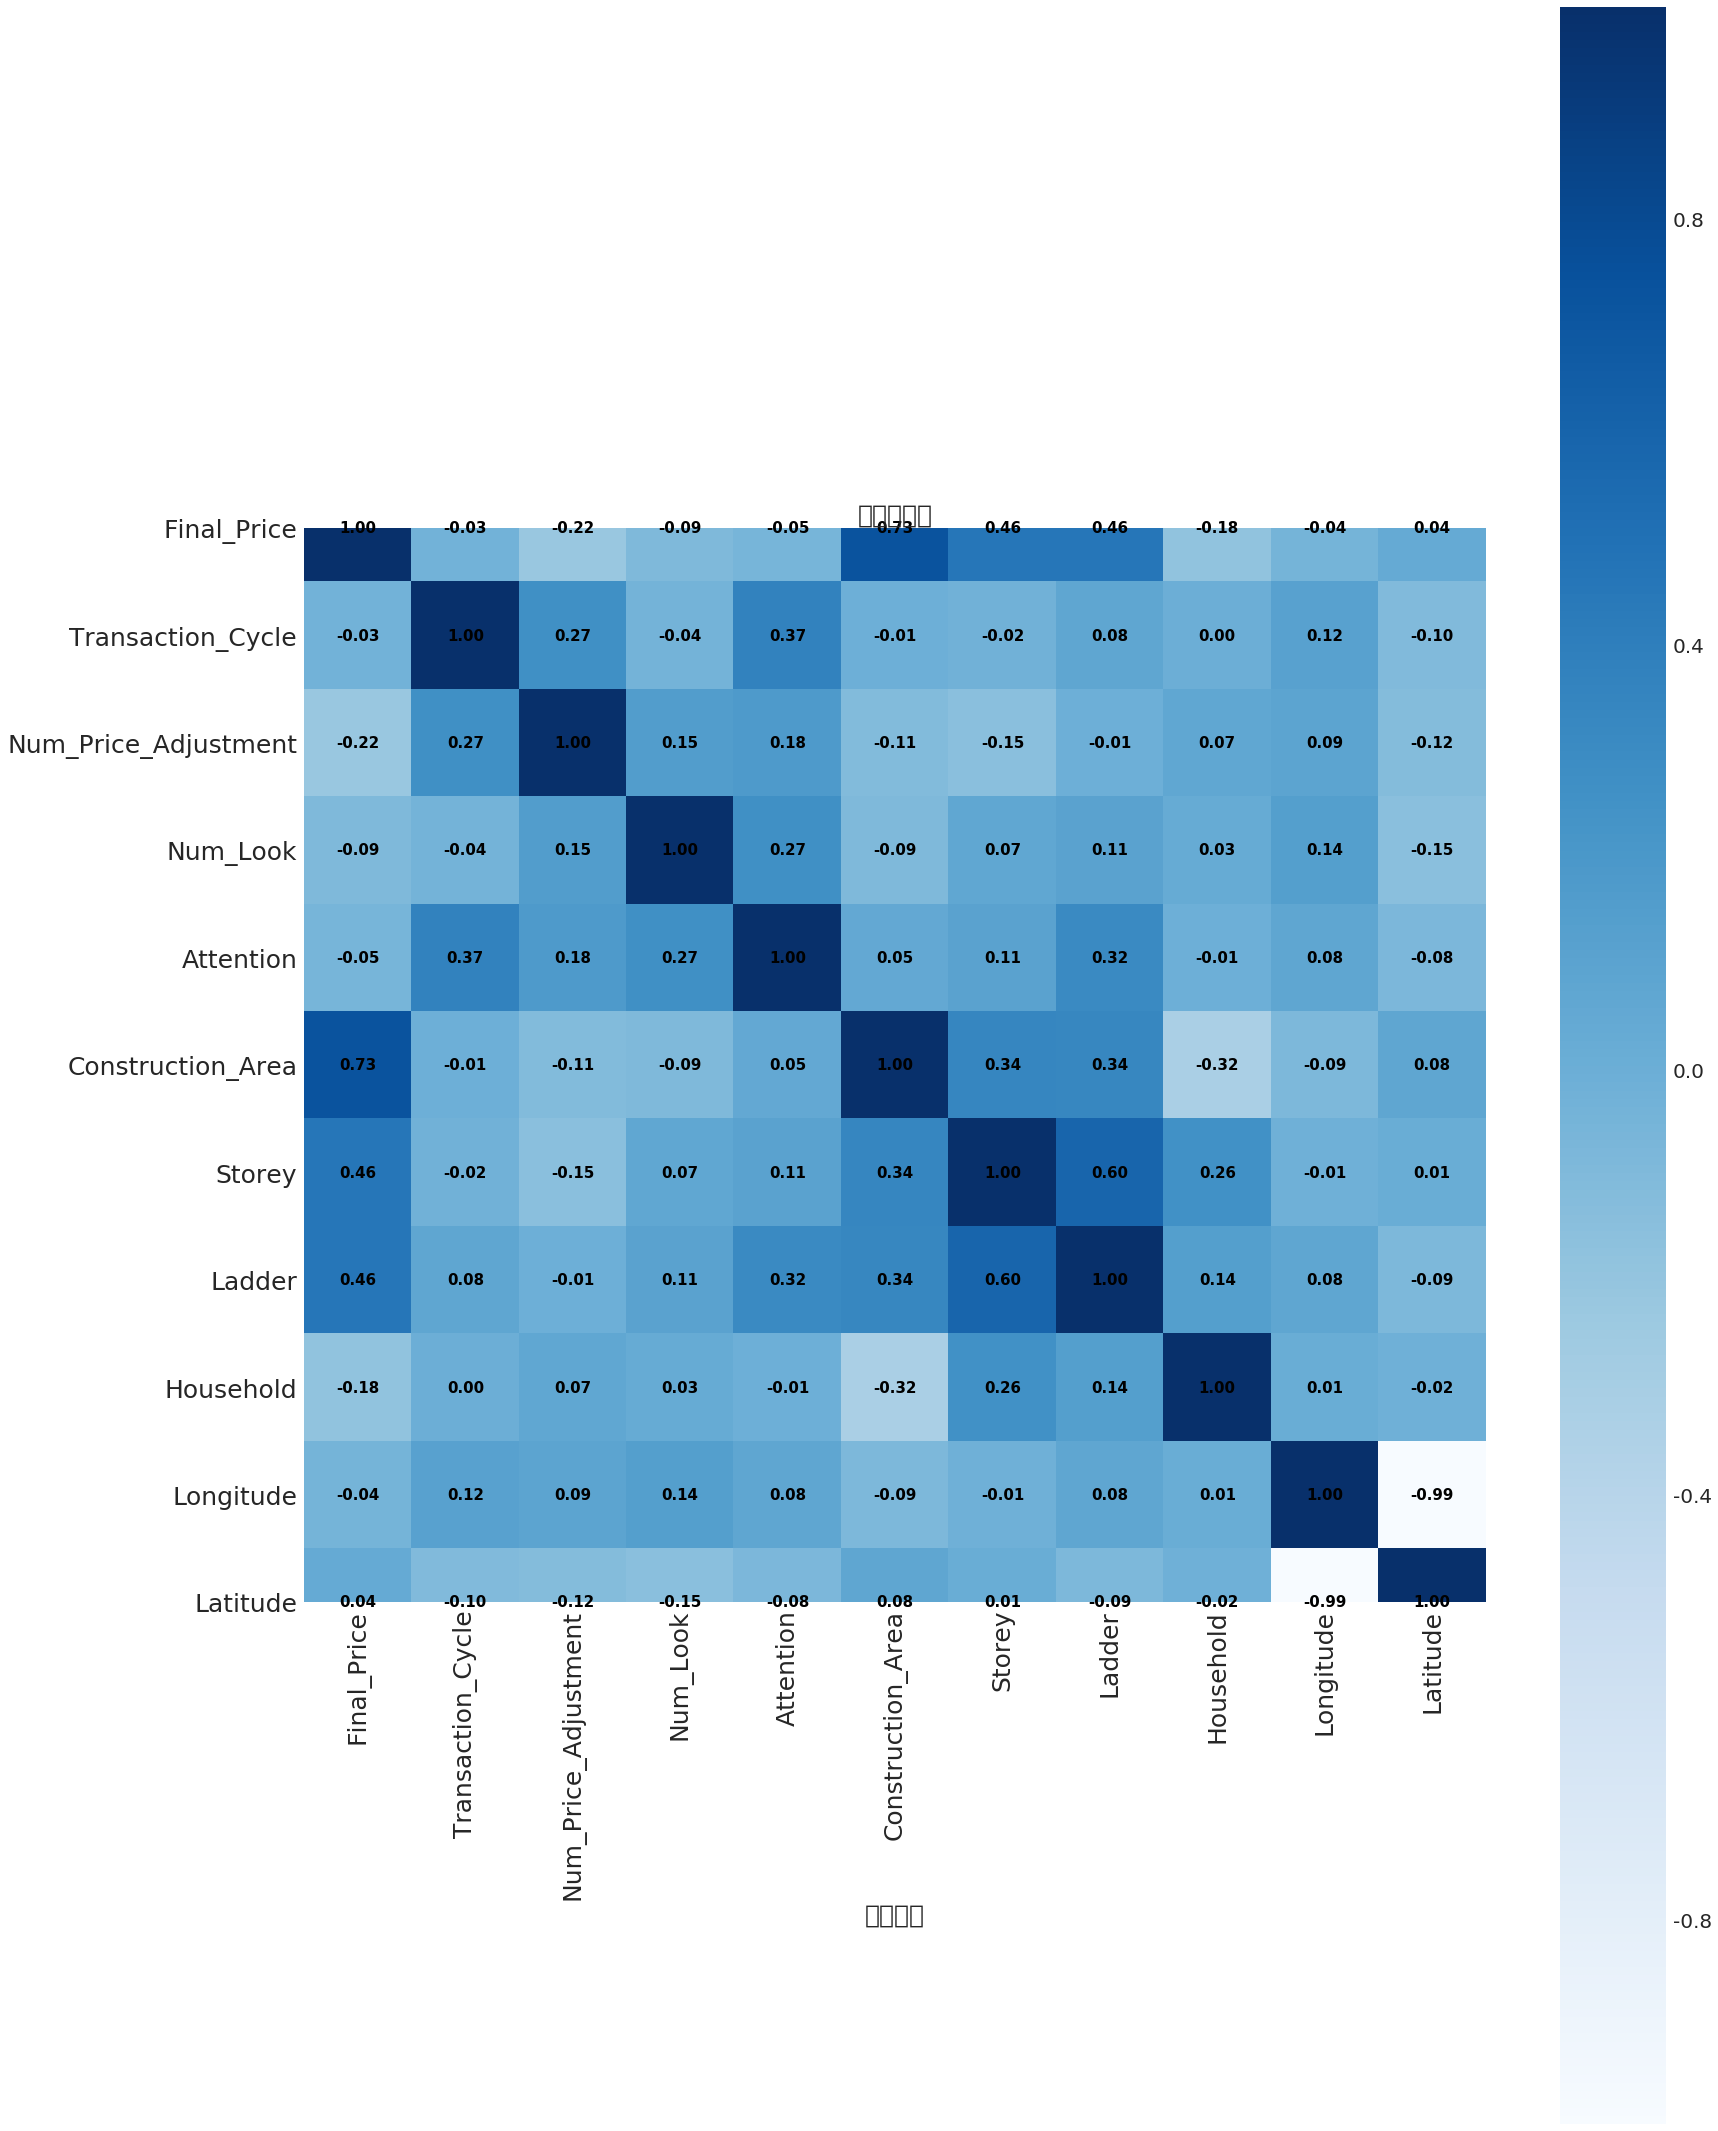

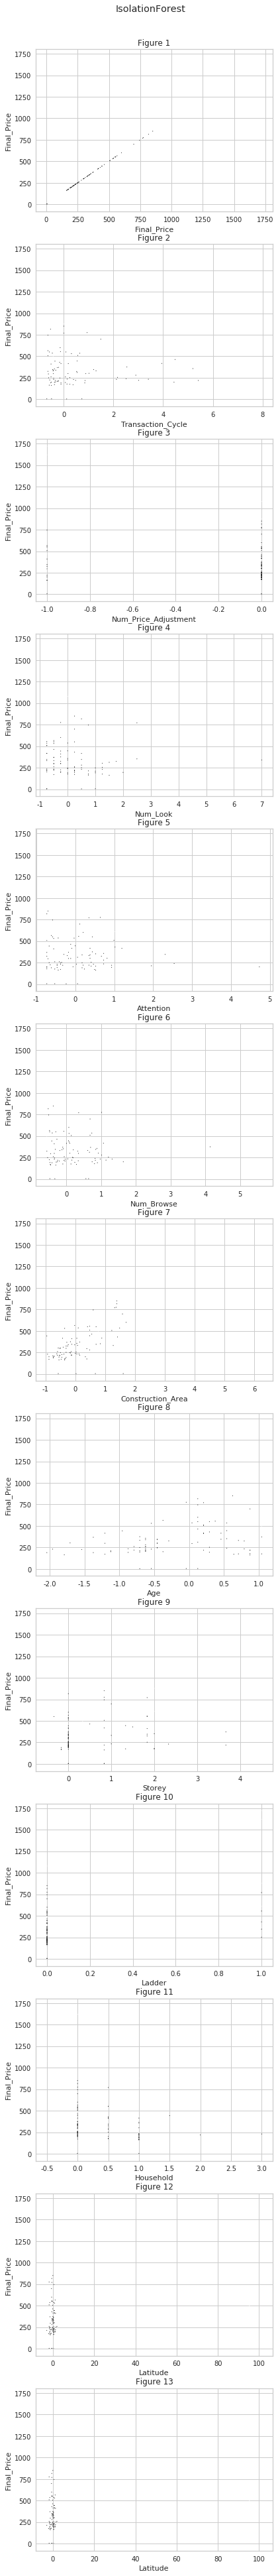

异常检测数： 13
异常检测后数据规格：(100, 14)
耗时：12.0589
异常检测结束


,House_Type,Final_Price,Transaction_Cycle,Num_Price_Adjustment,Num_Look,Attention,Num_Browse,Floor,Construction_Area,Unit_Structure,...,Ladder_Ratio,Elevator,Trading_Authority,Housing_Purposes,House_Ownership,Storey,Ladder,Household,Longitude,Latitude
0,1室1厅,218.0,0.857895,0.0,0.25,-0.467153,-0.069801,中,-0.598802,平层,...,一梯六户,有,动迁安置房,普通住宅,非共有,3.666667,0.0,2.0,121.514616,-0.309423
1,2室1厅,368.0,-0.257895,0.0,-0.50,-0.729927,0.694722,低,-0.287425,平层,...,一梯四户,无,商品房,普通住宅,非共有,0.000000,0.0,1.0,121.504486,0.259002
2,3室2厅,775.0,0.942105,0.0,-0.25,0.642336,1.010996,高,1.365269,跃层,...,一梯两户,有,商品房,普通住宅,共有,0.833333,0.0,0.0,121.795869,-1.848563
3,1室1厅,219.0,5.415789,0.0,-0.75,0.934307,0.831554,低,-0.526946,平层,...,一梯两户,无,商品房,普通住宅,共有,0.000000,0.0,0.0,121.674434,1.257378
4,3室2厅,331.0,-0.426316,0.0,-0.50,-0.204380,-0.191235,中,1.269461,平层,...,一梯两户,有,商品房,普通住宅,共有,1.000000,0.0,0.0,121.705099,0.346396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,2室1厅,220.0,3.015789,0.0,0.25,0.350365,1.138167,低,-0.119760,平层,...,一梯两户,无,商品房,普通住宅,共有,0.000000,0.0,0.0,121.407487,-0.943820
83,3室2厅,878.0,0.015789,0.0,-0.75,-0.408759,-0.218327,低,1.461078,平层,...,两梯四户,有,商品房,普通住宅,非共有,2.000000,1.0,1.0,121.371859,-0.152070
84,2室2厅,371.0,-0.205263,0.0,-0.50,-0.175182,-0.107729,高,0.143713,平层,...,一梯两户,有,商品房,普通住宅,非共有,3.666667,0.0,0.0,121.387241,-1.405493
85,3室2厅,850.0,0.005263,0.0,0.25,-0.700730,-0.379920,低,1.389222,平层,...,一梯两户,有,商品房,普通住宅,共有,0.833333,0.0,0.0,121.341557,-0.034645


In [5]:
input_path =  '../../../Data/Price_System/Price_Predict/preprocess/house/used_house_data_test_intermediate.csv'
output_path = '../../../Data/Price_System/Price_Predict/qualified/house/used_house_data_test_qualified.csv'
docs_path = '../../../docs/Price_System/Price_Predict/'
data_qualified = predict_qualified(input_path=input_path, 
                                   output_path=output_path,
                                   docs_path=docs_path,
                                   name_of_target='Final_Price', cols=cols)
data_qualified

In [6]:
input_path='../../../Data/Price_System/Price_Predict/qualified/house/used_house_data_test_qualified.csv'
output_path='../../../Data/Price_System/Price_Predict/encoding/house/used_house_data_test_encoding.csv'
data_encoding = predict_encoding(input_path=input_path,
                                 output_path=output_path,
                                 cols=cols,
                                 name_of_target='Final_Price',
                                 type_of_encoding='target')
data_encoding

数据编码开始
编码后数据规格：(87, 25)
耗时：0.0574
数据编码结束


,House_Type,Final_Price,Transaction_Cycle,Num_Price_Adjustment,Num_Look,Attention,Num_Browse,Floor,Construction_Area,Unit_Structure,...,Ladder_Ratio,Elevator,Trading_Authority,Housing_Purposes,House_Ownership,Storey,Ladder,Household,Longitude,Latitude
0,327.508514,218.0,0.857895,0.0,0.25,-0.467153,-0.069801,331.221151,-0.598802,334.124048,...,334.554015,341.552458,332.813546,334.942529,330.940815,3.666667,0.0,2.0,121.514616,-0.309423
1,331.299246,368.0,-0.257895,0.0,-0.50,-0.729927,0.694722,336.173449,-0.287425,334.124048,...,328.312723,328.868041,337.102265,334.942529,330.940815,0.000000,0.0,1.0,121.504486,0.259002
2,345.347472,775.0,0.942105,0.0,-0.25,0.642336,1.010996,337.448488,1.365269,336.404514,...,338.339310,341.552458,337.102265,334.942529,338.909445,0.833333,0.0,0.0,121.795869,-1.848563
3,327.508514,219.0,5.415789,0.0,-0.75,0.934307,0.831554,336.173449,-0.526946,334.124048,...,338.339310,328.868041,337.102265,334.942529,338.909445,0.000000,0.0,0.0,121.674434,1.257378
4,345.347472,331.0,-0.426316,0.0,-0.50,-0.204380,-0.191235,331.221151,1.269461,334.124048,...,338.339310,341.552458,337.102265,334.942529,338.909445,1.000000,0.0,0.0,121.705099,0.346396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,331.299246,220.0,3.015789,0.0,0.25,0.350365,1.138167,336.173449,-0.119760,334.124048,...,338.339310,328.868041,337.102265,334.942529,338.909445,0.000000,0.0,0.0,121.407487,-0.943820
83,345.347472,878.0,0.015789,0.0,-0.75,-0.408759,-0.218327,336.173449,1.461078,334.124048,...,336.746706,341.552458,337.102265,334.942529,330.940815,2.000000,1.0,1.0,121.371859,-0.152070
84,338.102052,371.0,-0.205263,0.0,-0.50,-0.175182,-0.107729,337.448488,0.143713,334.124048,...,338.339310,341.552458,337.102265,334.942529,330.940815,3.666667,0.0,0.0,121.387241,-1.405493
85,345.347472,850.0,0.005263,0.0,0.25,-0.700730,-0.379920,336.173449,1.389222,334.124048,...,338.339310,341.552458,337.102265,334.942529,338.909445,0.833333,0.0,0.0,121.341557,-0.034645


In [7]:
input_path='../../../Data/Price_System/Price_Predict/encoding/house/used_house_data_test_encoding.csv'
output_path='../../../Data/Price_System/Price_Predict/feature/house/used_house_data_test_feature.csv'
data_feature = predict_feature(input_path=input_path,
                               output_path=output_path,
                               num_of_feature=15, name_of_target='Final_Price')
data_feature

,House_Type,Final_Price,Transaction_Cycle,Num_Look,Attention,Floor,Construction_Area,Oriented,Renovation,Construction_struct,Ladder_Ratio,Elevator,Trading_Authority,Storey,Longitude,Latitude
0,327.508514,218.0,0.857895,0.25,-0.467153,331.221151,-0.598802,331.279046,333.243835,343.238363,334.554015,341.552458,332.813546,3.666667,121.514616,-0.309423
1,331.299246,368.0,-0.257895,-0.50,-0.729927,336.173449,-0.287425,331.279046,341.520115,326.670810,328.312723,328.868041,337.102265,0.000000,121.504486,0.259002
2,345.347472,775.0,0.942105,-0.25,0.642336,337.448488,1.365269,331.279046,331.921366,343.238363,338.339310,341.552458,337.102265,0.833333,121.795869,-1.848563
3,327.508514,219.0,5.415789,-0.75,0.934307,336.173449,-0.526946,331.279046,341.520115,343.238363,338.339310,328.868041,337.102265,0.000000,121.674434,1.257378
4,345.347472,331.0,-0.426316,-0.50,-0.204380,331.221151,1.269461,331.279046,333.243835,343.238363,338.339310,341.552458,337.102265,1.000000,121.705099,0.346396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,331.299246,220.0,3.015789,0.25,0.350365,336.173449,-0.119760,331.279046,332.689767,326.670810,338.339310,328.868041,337.102265,0.000000,121.407487,-0.943820
83,345.347472,878.0,0.015789,-0.75,-0.408759,336.173449,1.461078,331.279046,341.520115,343.238363,336.746706,341.552458,337.102265,2.000000,121.371859,-0.152070
84,338.102052,371.0,-0.205263,-0.50,-0.175182,337.448488,0.143713,331.279046,333.243835,343.238363,338.339310,341.552458,337.102265,3.666667,121.387241,-1.405493
85,345.347472,850.0,0.005263,0.25,-0.700730,336.173449,1.389222,331.279046,341.520115,343.238363,338.339310,341.552458,337.102265,0.833333,121.341557,-0.034645


In [8]:
input_path = '../../../Data/Price_System/Price_Predict/feature/house/used_house_data_test_feature.csv'
model_path = '../../../output/Price_System/Price_Predict/model/price_predict_bagging.pkl'
train, test_result, train_X, test_X, test_y =  predict_model(input_path=input_path,
                                                             model_path = model_path,                                                             
                                                             name_of_model='bagging',
                                                             name_of_target='Final_Price')
train

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [9]:
train_X.to_csv('../../../output/Price_System/Price_Predict/model/bagging_train_X.csv' ,index=False)
train_X

,House_Type,Transaction_Cycle,Num_Look,Attention,Floor,Construction_Area,Oriented,Renovation,Construction_struct,Ladder_Ratio,Elevator,Trading_Authority,Storey,Longitude,Latitude
0,327.508514,0.857895,0.25,-0.467153,331.221151,-0.598802,331.279046,333.243835,343.238363,334.554015,341.552458,332.813546,3.666667,121.514616,-0.309423
1,331.299246,-0.257895,-0.50,-0.729927,336.173449,-0.287425,331.279046,341.520115,326.670810,328.312723,328.868041,337.102265,0.000000,121.504486,0.259002
2,345.347472,0.942105,-0.25,0.642336,337.448488,1.365269,331.279046,331.921366,343.238363,338.339310,341.552458,337.102265,0.833333,121.795869,-1.848563
3,327.508514,5.415789,-0.75,0.934307,336.173449,-0.526946,331.279046,341.520115,343.238363,338.339310,328.868041,337.102265,0.000000,121.674434,1.257378
4,345.347472,-0.426316,-0.50,-0.204380,331.221151,1.269461,331.279046,333.243835,343.238363,338.339310,341.552458,337.102265,1.000000,121.705099,0.346396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,345.347472,0.647368,-0.75,-0.029197,336.173449,1.485030,338.933635,331.921366,343.238363,338.339310,328.868041,337.102265,0.000000,121.414902,-1.528095
66,331.299246,-0.373684,0.25,-0.379562,336.173449,-0.479042,331.279046,341.520115,326.670810,338.339310,328.868041,337.102265,-0.166667,121.408866,-1.542127
67,331.299246,2.542105,-0.25,0.437956,337.448488,-0.167665,331.279046,341.520115,326.670810,338.339310,328.868041,337.102265,0.000000,121.405382,-0.020942
68,338.102052,-0.615789,-0.50,-0.700730,336.173449,0.383234,331.279046,331.921366,343.238363,338.339310,328.868041,337.102265,0.000000,121.473464,-1.271379


In [10]:
model_path = '../../../output/Price_System/Price_Predict/model/price_predict_bagging.pkl'
data_path = '../../../Data/Price_System/Price_Predict/feature/house/used_house_data_test_feature.csv'
result = predict_prediction(model_path=model_path,
                            data_path=data_path,
                            name_of_target='Final_Price')
result

array([210.4, 364.9, 730.6, 229.6, 379.2, 371.5, 298.2, 217.9, 248.3,
       453.5, 190.9, 345.5, 524.9, 228.8, 208.2, 498.1, 280.2, 210.7,
       317.9, 211. , 207.1, 290.8, 302.1, 139.8, 270.9, 436. , 233.8,
       339.6, 266. , 426.1, 231.8, 361.3, 592.7, 291.9, 260. , 299.2,
       424.6, 240.7, 186.3, 371.2, 268. , 261.8, 412.1, 225.4, 427.8,
       349.5, 192.4, 360.5, 407.9, 776.2, 486.5, 291.4, 220.7, 512.4,
       618. , 273.5, 335.5, 218.6, 422.9, 254.9, 219. , 772.6, 336. ,
       467.4, 206.8, 557.8, 183.4, 324.5, 367.1, 386.7, 319.6, 227.4,
       267. , 617.4, 566.2, 559.7, 310.7, 256. , 274.1, 215.6, 352.5,
       265.4, 262. , 512.9, 293.9, 614.4, 472.3])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


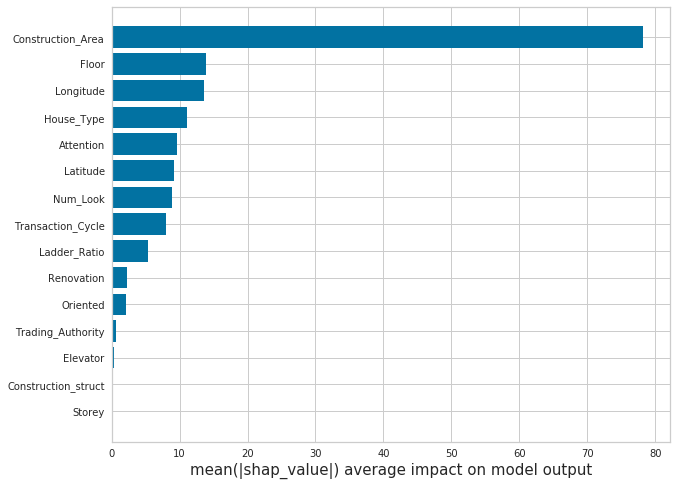

In [11]:
name_of_model = 'bagging'
model_path = '../../../output/Price_System/Price_Predict/model/price_predict_bagging.pkl'
data_path = '../../../output/Price_System/Price_Predict/model/bagging_train_X.csv'
output_path = '../../../output/Price_System/Price_Predict/analysis/bagging_shap.png'
predict_analysis(model_path=model_path,
                 name_of_model=name_of_model,
                 data_path=data_path,
                 output_path=output_path)

In [12]:
input_path = '../../../Data/Price_System/Price_Predict/feature/house/used_house_data_test_feature.csv'
model_path = '../../../output/Price_System/Price_Predict/model/price_predict_xgboost.pkl'
train, test_result, train_X, test_X, test_y =  predict_model(input_path=input_path,
                                                             model_path = model_path,                                                             
                                                             name_of_model='xgboost',
                                                             name_of_target='Final_Price')
train

XGBRegressor(alpha=0, base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             lambda_=1, learning_rate=0.300000012, max_bin=256,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints=None, n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror', random_state=0,
             refresh_leaf=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             sketch_eps=0.03, ...)

In [13]:
train_X.to_csv('../../../output/Price_System/Price_Predict/model/xgboost_train_X.csv',index=False)
train_X

,House_Type,Transaction_Cycle,Num_Look,Attention,Floor,Construction_Area,Oriented,Renovation,Construction_struct,Ladder_Ratio,Elevator,Trading_Authority,Storey,Longitude,Latitude
0,327.508514,0.857895,0.25,-0.467153,331.221151,-0.598802,331.279046,333.243835,343.238363,334.554015,341.552458,332.813546,3.666667,121.514616,-0.309423
1,331.299246,-0.257895,-0.50,-0.729927,336.173449,-0.287425,331.279046,341.520115,326.670810,328.312723,328.868041,337.102265,0.000000,121.504486,0.259002
2,345.347472,0.942105,-0.25,0.642336,337.448488,1.365269,331.279046,331.921366,343.238363,338.339310,341.552458,337.102265,0.833333,121.795869,-1.848563
3,327.508514,5.415789,-0.75,0.934307,336.173449,-0.526946,331.279046,341.520115,343.238363,338.339310,328.868041,337.102265,0.000000,121.674434,1.257378
4,345.347472,-0.426316,-0.50,-0.204380,331.221151,1.269461,331.279046,333.243835,343.238363,338.339310,341.552458,337.102265,1.000000,121.705099,0.346396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,345.347472,0.647368,-0.75,-0.029197,336.173449,1.485030,338.933635,331.921366,343.238363,338.339310,328.868041,337.102265,0.000000,121.414902,-1.528095
66,331.299246,-0.373684,0.25,-0.379562,336.173449,-0.479042,331.279046,341.520115,326.670810,338.339310,328.868041,337.102265,-0.166667,121.408866,-1.542127
67,331.299246,2.542105,-0.25,0.437956,337.448488,-0.167665,331.279046,341.520115,326.670810,338.339310,328.868041,337.102265,0.000000,121.405382,-0.020942
68,338.102052,-0.615789,-0.50,-0.700730,336.173449,0.383234,331.279046,331.921366,343.238363,338.339310,328.868041,337.102265,0.000000,121.473464,-1.271379


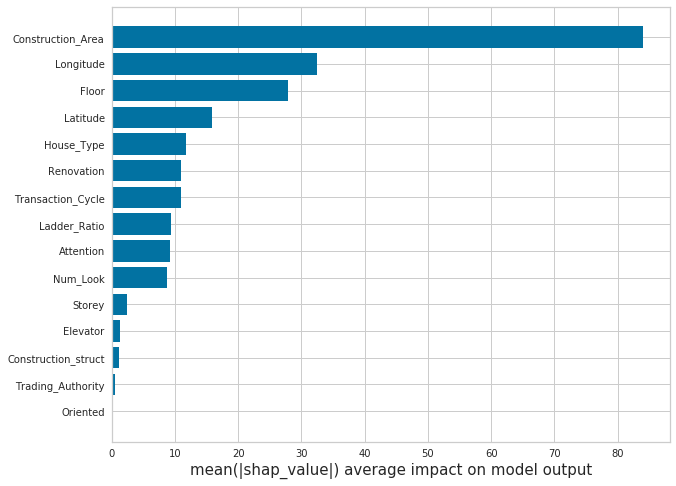

In [14]:
name_of_model = 'xgboost'
model_path = '../../../output/Price_System/Price_Predict/model/price_predict_xgboost.pkl'
data_path = '../../../output/Price_System/Price_Predict/model/xgboost_train_X.csv'
output_path = '../../../output/Price_System/Price_Predict/analysis/xgboost_shap.png'
predict_analysis(model_path=model_path,
                 name_of_model=name_of_model,
                 data_path=data_path,
                 output_path=output_path)